#**Understanding Buyer Habbits and Doing Customer Segmentation with K-Means**

**Background**

Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching their website when the covid-19 hits and making them grow faster than ever.However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget.

**Objective**

-Find out the buyer habbits

-Doing customer segmentation

-Give recommendation to company regarding buyer habbits and customer segmentation

#**1. Import Library and Dataset**

In [ ]:
#Import the library needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
#I save the dataset in googlesheet. There are three dataset that we use.
sheet_url1 = 'https://docs.google.com/spreadsheets/d/17skGdlO3cfvN6ibmGGRXrWCpJbZms0uAJejRBYd7faU/edit#gid=1129940404'
sheet_url1_trf = sheet_url1.replace('/edit#gid=', '/export?format=csv&gid=')
customer = pd.read_csv(sheet_url1_trf)
sheet_url2 = 'https://docs.google.com/spreadsheets/d/1Hg2Oxf_nfDKJXk_7OgQWY6MsAC_FMDDW8PdRalBpm_Y/edit#gid=423024778'
sheet_url2_trf = sheet_url2.replace('/edit#gid=', '/export?format=csv&gid=')
order = pd.read_csv(sheet_url2_trf)
sheet_url3 = 'https://docs.google.com/spreadsheets/d/1wGfbibwSdyqf7WPZg_NUwxocXqbNIdQhK9CCuOEsils/edit#gid=965375429'
sheet_url3_trf = sheet_url3.replace('/edit#gid=', '/export?format=csv&gid=')
payment = pd.read_csv(sheet_url3_trf)



#**2. Data Cleaning**

##2.1 Check the Dataset

In [ ]:
#here, I checked the dataset one by one.
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


In [ ]:
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


##2.2 Merge the Data

In [ ]:
#merge three of the dataset
df_orderpayment = order.merge(payment, how='left', left_on='order_id', right_on='order_id')
df = df_orderpayment.merge(customer, how='left', left_on='customer_id', right_on='customer_id')

In [ ]:
#check the dataset that we just merge
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00,1.0,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00,1.0,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00,1.0,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


##2.3 Removing Irrelevant Values

In [ ]:
#drop variable that is not used for further analysis
df = df.drop(columns=['customer_zip_code_prefix', 'customer_unique_id', 'payment_sequential', 'order_delivered_carrier_date', 'order_approved_at'])

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 0:00:00,credit_card,1.0,18.12,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 0:00:00,voucher,1.0,2.00,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 0:00:00,voucher,1.0,18.59,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 0:00:00,boleto,1.0,141.46,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-17 18:06:29,2018-09-04 0:00:00,credit_card,3.0,179.12,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-17 15:08:01,2017-03-28 0:00:00,credit_card,3.0,85.08,sao jose dos campos,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02 0:00:00,credit_card,3.0,195.00,praia grande,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27 0:00:00,credit_card,5.0,271.01,nova vicosa,BA
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15 0:00:00,credit_card,4.0,441.16,japuiba,RJ


In [ ]:
#This is the value of payment_type variable. We can see that there are not_defined data, so we will erase it
df["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
#erase the not_defined data from payment_type variable
df= df[df["payment_type"] != 'not_defined']

In [ ]:
#I want to choose the data beetwen 2017-01-01 and 2018-08-31
df = df[(df['order_purchase_timestamp']>='2017-01-01') & (df['order_purchase_timestamp']<='2018-08-31')]

##2.4 Drop Duplicated Data

In [ ]:
#Check whether there are duplicated rows or not
df[df['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city,customer_state
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 0:00:00,voucher,1.0,2.00,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 0:00:00,voucher,1.0,18.59,sao paulo,SP
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-16 17:14:30,2017-08-23 0:00:00,credit_card,1.0,8.34,sorocaba,SP
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,2017-11-23 0:00:00,voucher,1.0,24.86,feira de santana,BA
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,2017-11-23 0:00:00,credit_card,1.0,5.96,feira de santana,BA
...,...,...,...,...,...,...,...,...,...,...,...
103774,0572c996d9b4a7645bb071a158a64bbb,874b661d62c1e74aafa401942f9d94cb,delivered,2017-11-20 21:53:20,2017-11-27 21:28:53,2017-12-11 0:00:00,credit_card,1.0,42.59,rio de janeiro,RJ
103783,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 14:46:51,2018-04-30 21:41:07,2018-05-14 0:00:00,voucher,1.0,49.32,belem,PA
103784,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 14:46:51,2018-04-30 21:41:07,2018-05-14 0:00:00,voucher,1.0,8.13,belem,PA
103878,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-20 20:25:45,2017-11-07 0:00:00,voucher,1.0,64.37,cuiaba,MT


In [ ]:
#drop duplicate rows 
df=df.drop_duplicates(subset=['order_id'], keep='last')

In [ ]:
#check the duplicate rows. We can see that there are no duplicated rows anymore
df[df['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city,customer_state


##2.5 Change Data Type of Variable

In [ ]:
#Check the data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99089 entries, 2 to 103886
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99089 non-null  object 
 1   customer_id                    99089 non-null  object 
 2   order_status                   99089 non-null  object 
 3   order_purchase_timestamp       99089 non-null  object 
 4   order_delivered_customer_date  96204 non-null  object 
 5   order_estimated_delivery_date  99089 non-null  object 
 6   payment_type                   99089 non-null  object 
 7   payment_installments           99089 non-null  float64
 8   payment_value                  99089 non-null  float64
 9   customer_city                  99089 non-null  object 
 10  customer_state                 99089 non-null  object 
dtypes: float64(2), object(9)
memory usage: 9.1+ MB


In [ ]:
#Change data type object to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [ ]:
#Change data type object to string
df["order_status"] = pd.Series(df['order_status'], dtype='string')
df["payment_type"] = pd.Series(df['payment_type'], dtype='string')
df["customer_city"] = pd.Series(df['customer_city'], dtype='string')
df["customer_state"] = pd.Series(df['customer_state'], dtype='string')
df["order_id"] = pd.Series(df['order_id'], dtype='string')
df["customer_id"] = pd.Series(df['customer_id'], dtype='string')

In [ ]:
# check the data type of variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99089 entries, 2 to 103886
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99089 non-null  string        
 1   customer_id                    99089 non-null  string        
 2   order_status                   99089 non-null  string        
 3   order_purchase_timestamp       99089 non-null  datetime64[ns]
 4   order_delivered_customer_date  96204 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99089 non-null  datetime64[ns]
 6   payment_type                   99089 non-null  string        
 7   payment_installments           99089 non-null  float64       
 8   payment_value                  99089 non-null  float64       
 9   customer_city                  99089 non-null  string        
 10  customer_state                 99089 non-null  string        
dtypes: datetime64[

##2.6 Handling Missing Values

In [ ]:
#Check the missing value of each variable. From this information, we can see that there are 2885 value is missing in order_delivered_customer_date
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2885
order_estimated_delivery_date       0
payment_type                        0
payment_installments                0
payment_value                       0
customer_city                       0
customer_state                      0
dtype: int64

In [ ]:
#We calculate avg_delivery_range to fill missing value in order_delivered_customer_date
avg_delivery_range = (df["order_estimated_delivery_date"] - df["order_delivered_customer_date"]).mean()

In [ ]:
avg_delivery_range

Timedelta('11 days 02:37:56.390940085')

In [ ]:
#fill missing value in order_delivered_customer_date with avg_delivery_range
df["order_delivered_customer_date"].fillna(df["order_purchase_timestamp"]+ avg_delivery_range, inplace = True)

##2.7 Removing Outlier

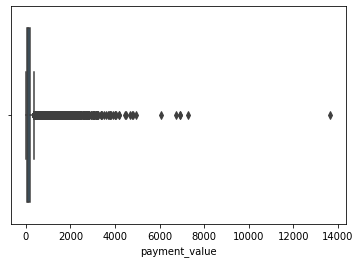

In [ ]:
#Check the outlier of payment_value variable using boxplot. From this visualization, we can see that there are many outlier.
sns.boxplot(x=df["payment_value"]);

In [ ]:
#Get the function of IQR, the method of knowing the limit of the outlier
def get_IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x,75)
    iqr=q3-q1
    lower_limit = q1 - (iqr*1.5)
    upper_limit = q3 + (iqr*1.5)
    return lower_limit, upper_limit

In [ ]:
#Set the limit of the outlier using IQR
x,y = get_IQR(df['payment_value'])

In [ ]:
#Erase the outlier based on IQR function
df = df[(df['payment_value']>x) & (df['payment_value']<y)]

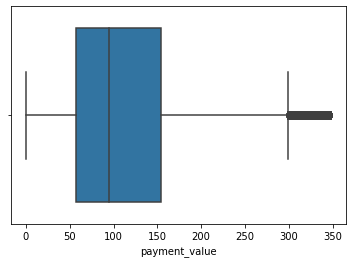

In [ ]:
#There is the final outlier boxplot from payment_value variable.
sns.boxplot(x=df["payment_value"])

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city,customer_state
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,voucher,1.0,18.59,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,boleto,1.0,141.46,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,credit_card,3.0,179.12,vianopolis,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,credit_card,1.0,72.20,sao goncalo do amarante,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,credit_card,1.0,28.62,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...
103881,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-06 11:08:08,2017-03-22,credit_card,3.0,155.99,sao paulo,SP
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,credit_card,3.0,85.08,sao jose dos campos,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,credit_card,3.0,195.00,praia grande,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,credit_card,5.0,271.01,nova vicosa,BA


##2.8 Adding New Column

In [ ]:
#New Variable is used to analysis data in hour, weekday, month, and year
df['hour_order'] = pd.DatetimeIndex(df['order_purchase_timestamp']).hour
df['day_order'] = pd.DatetimeIndex(df['order_purchase_timestamp']).weekday
df['month_order'] =pd.to_datetime(df['order_purchase_timestamp']).dt.strftime('%Y/%m')
df['year_order'] =pd.DatetimeIndex(df['order_purchase_timestamp']).year

#**3. Exploratory Data Analysis (EDA)**

In [ ]:
#Save the current dataset (df) to our repository
with open('data_pick.pkl', 'wb') as pickle_file:
  pickle.dump(df, pickle_file)

##3.1 Descriptive Statistics

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_city', 'customer_state', 'hour_order', 'day_order',
       'month_order', 'year_order'],
      dtype='object')

In [ ]:
#This is the descriptive statistics from the non-numeric variable
df[['order_id', 'customer_id', 'order_status','payment_type', 'customer_city', 'customer_state']].describe()

,order_id,customer_id,order_status,payment_type,customer_city,customer_state
count,91362,91362,91362,91362,91362,91362
unique,91362,91362,8,4,3997,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,credit_card,sao paulo,SP
freq,1,1,88808,68659,14512,38974


In [ ]:
#This is the descriptive statistics from the numeric variable
df.describe()

,payment_installments,payment_value,hour_order,day_order,year_order
count,91362.000000,91362.000000,91362.000000,91362.000000,91362.000000
mean,2.688700,113.380470,14.771546,2.759353,2017.545128
std,2.476813,72.490971,5.342828,1.968389,0.497962
min,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,1.000000,57.145000,11.000000,1.000000,2017.000000
50%,1.000000,95.370000,15.000000,3.000000,2018.000000
75%,4.000000,153.990000,19.000000,4.000000,2018.000000
max,24.000000,347.420000,23.000000,6.000000,2018.000000


##3.2 Data Visualization

### 3.2.1 Top 10 total payment by state

In [ ]:
#Top 10 total payment by state
payment_bystate = df.groupby(df["customer_state"], as_index=False)["payment_value"].agg("sum").sort_values(by="payment_value",ascending=False).head(10)
payment_bystate

,customer_state,payment_value
25,SP,4108600.81
18,RJ,1391744.56
10,MG,1242732.34
22,RS,587240.62
17,PR,519597.37
23,SC,391146.37
4,BA,372552.77
6,DF,227731.51
7,ES,219114.11
8,GO,216756.44


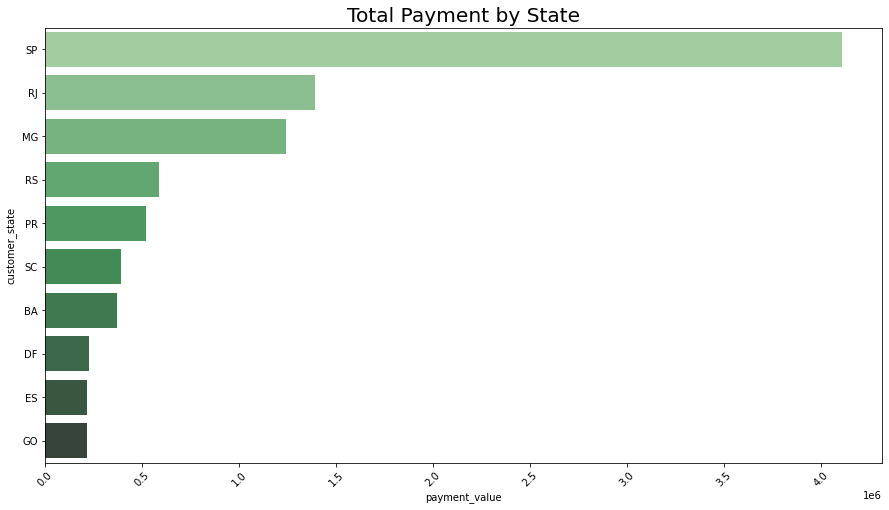

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
plt.style.use("fivethirtyeight")
ax = sns.barplot(x='payment_value', y='customer_state', data=payment_bystate, palette="Greens_d").set(title='Total Payment by State')

### 3.2.2 Top 10 total payment by city

In [ ]:
#Top 10 total payment by city
payment_bycity = df.groupby(df["customer_city"], as_index=False)["payment_value"].agg("sum").sort_values(by="payment_value",ascending=False).head(10)
payment_bycity

,customer_city,payment_value
3483,sao paulo,1496970.58
3050,rio de janeiro,735291.59
438,belo horizonte,292607.23
538,brasilia,226901.45
1106,curitiba,155484.22
2862,porto alegre,153036.13
682,campinas,140559.80
3141,salvador,132781.07
1480,guarulhos,120455.62
2385,niteroi,93469.05


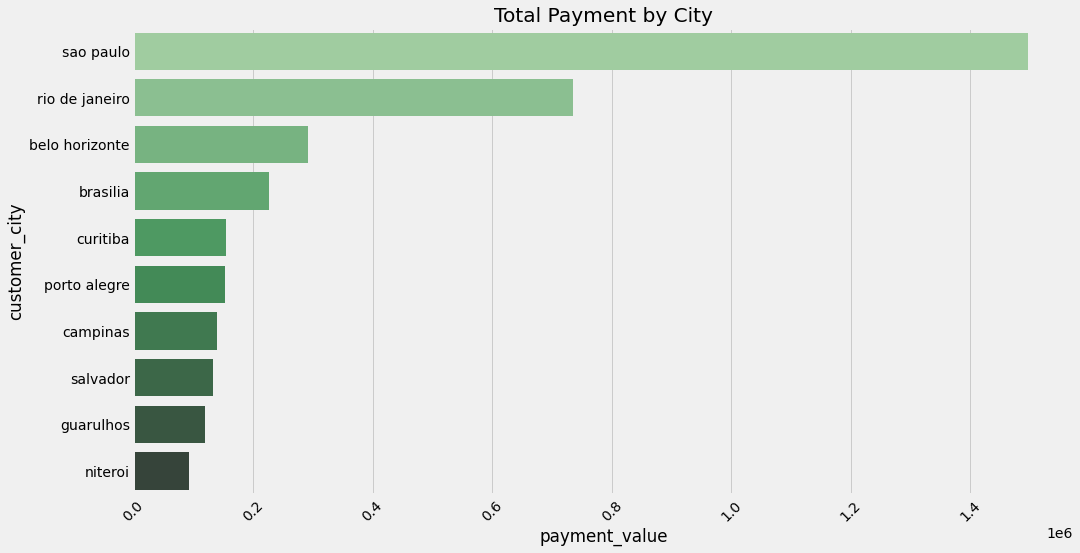

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
plt.style.use("fivethirtyeight")
ax = sns.barplot(x='payment_value', y='customer_city', data=payment_bycity, palette="Greens_d").set(title='Total Payment by City')

### 3.2.3 Total Payment by Payment Type

In [ ]:
#total payment by payment type
payment_bypayment_type = df.groupby(df["payment_type"], as_index=False)["payment_value"].agg("sum").sort_values(by="payment_value",ascending=False)
payment_bypayment_type["Percentage(%)"] = round((payment_bypayment_type["payment_value"]/payment_bypayment_type["payment_value"].sum())*100,2)
payment_bypayment_type

,payment_type,payment_value,Percentage(%)
1,credit_card,8037161.14,77.59
0,boleto,1977435.66,19.09
3,voucher,193741.75,1.87
2,debit_card,150327.94,1.45


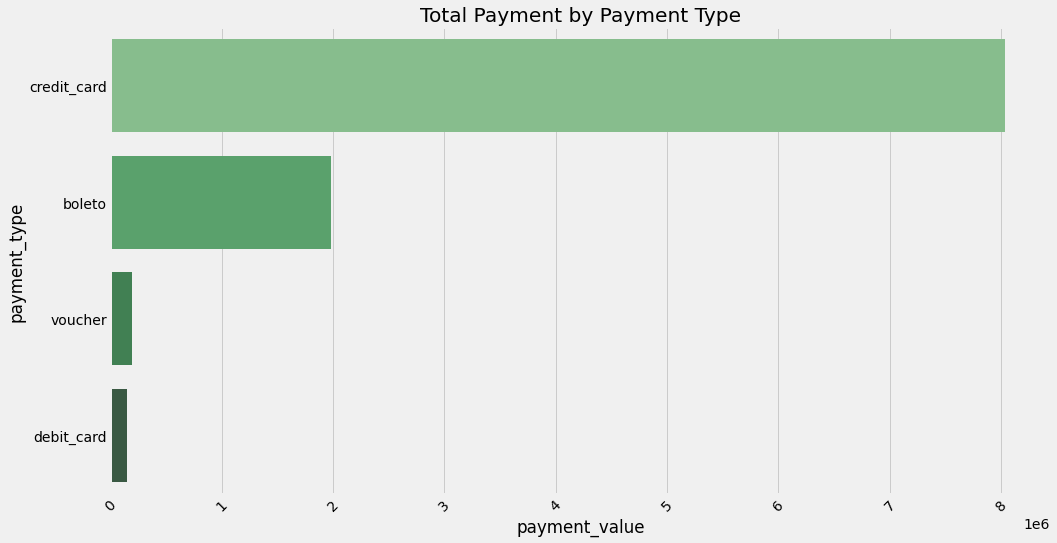

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
plt.style.use("fivethirtyeight")
ax = sns.barplot(x='payment_value', y='payment_type', data=payment_bypayment_type, palette="Greens_d").set(title='Total Payment by Payment Type')

### 3.2.4 Total Order by Hour

In [ ]:
hour_order = df["hour_order"].value_counts().rename_axis('hour').reset_index().sort_values(by='hour' ,ascending=True)
hour_order = hour_order.set_index("hour")
hour_order

,hour_order
hour,
0,2219
1,1086
2,482
3,251
4,194
5,181
6,474
7,1138
8,2726


''

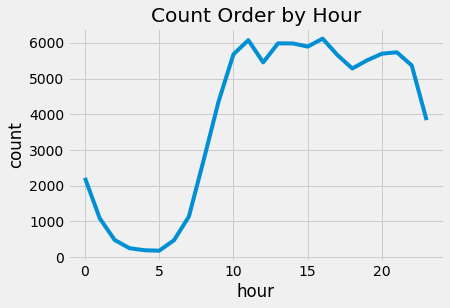

In [ ]:
plt.plot(hour_order)
plt.xlabel("hour")
plt.ylabel("count")
plt.title("Count Order by Hour")
;

### 3.2.5 Total Order by Day

In [ ]:
day_order = df["day_order"].value_counts().rename_axis('day').reset_index().sort_values(by='day' ,ascending=True)
day_order['day'] = day_order['day'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
day_order = day_order.set_index("day")
day_order

,day_order
day,
Monday,14847
Tuesday,14674
Wednesday,14270
Thursday,13563
Friday,12934
Saturday,9983
Sunday,11091


''

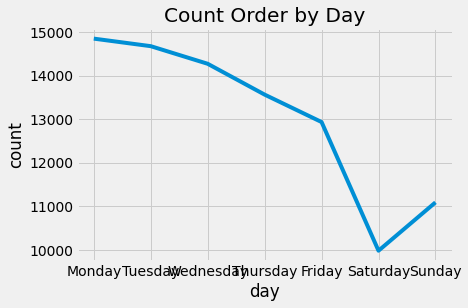

In [ ]:
plt.plot(day_order)
plt.xlabel("day")
plt.ylabel("count")
plt.rcParams["figure.figsize"] = (30,10)
plt.title("Count Order by Day")
;

### 3.2.6 Total Order by Month

In [ ]:
month_order = df["month_order"].value_counts().rename_axis('month').reset_index().sort_values(by='month' ,ascending=True)
month_order = month_order.set_index("month")
month_order

,month_order
month,
2017/01,705
2017/02,1636
2017/03,2462
2017/04,2194
2017/05,3409
2017/06,3012
2017/07,3755
2017/08,4007
2017/09,3917


''

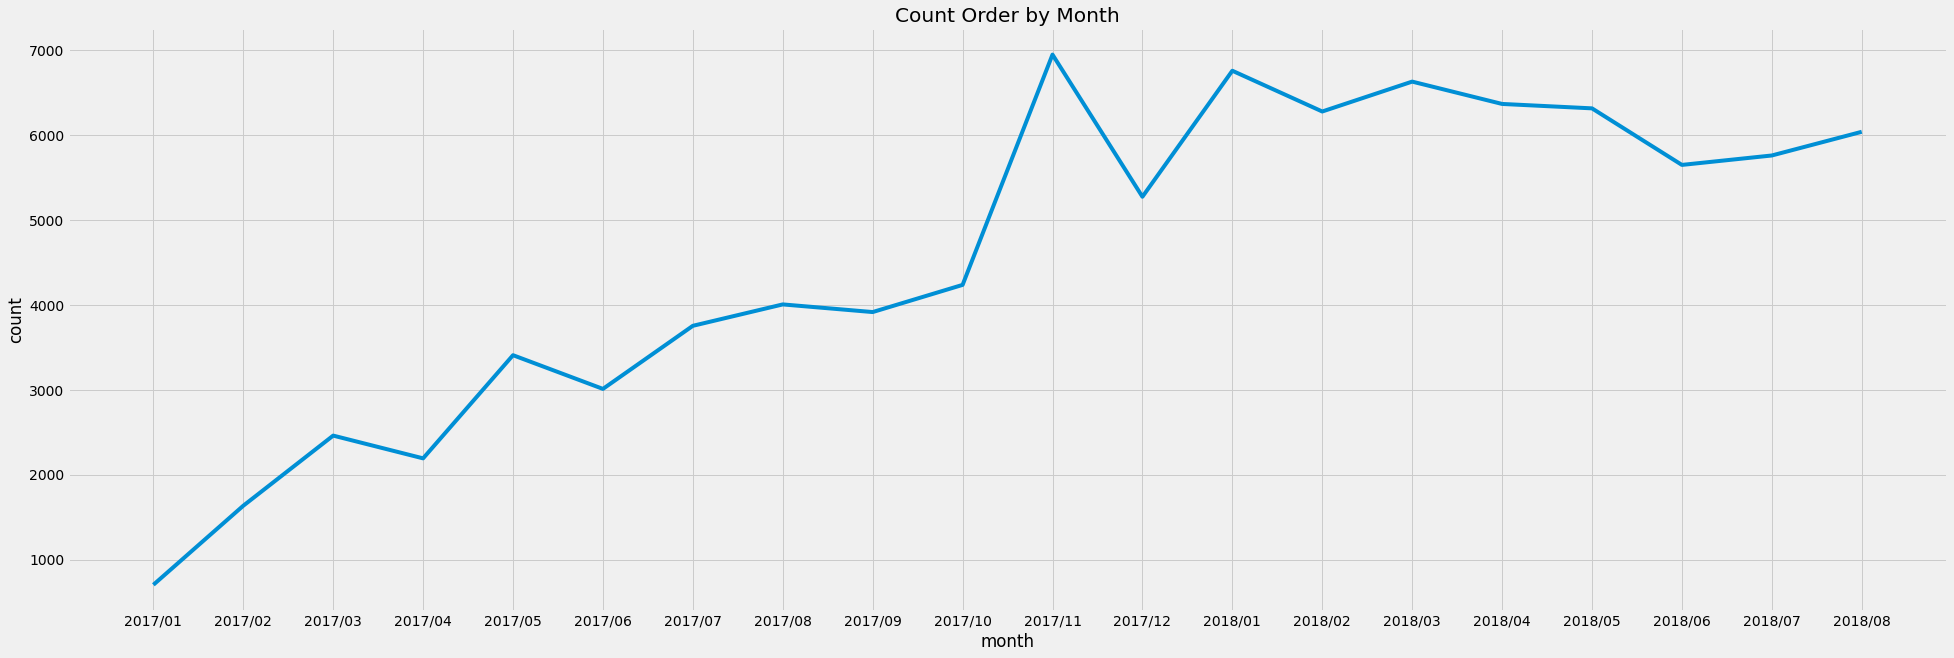

In [ ]:
plt.plot(month_order, )
plt.xlabel("month")
plt.ylabel("count")
plt.rcParams["figure.figsize"] = (30,10)
plt.title("Count Order by Month")
;

##3.3 Insight and Business Recomendation of EDA

Insight:
*   On average, one order gives 113€ revenue to the company
*   Our customers live in 27 state and 3997 city in Portugal	
*   The **top 3 of highest revenue by state code** are: SP (4108600€), RJ (1391744€), MG (1242732€)
*   The **top 3 of highest revenue by city** are: Sao Paulo (1496970€), Rio De Janeiro (735291€), and Belo Horizonte (292607€)
*   77.59% of company revenue is obtained by **credit card**. Maybe we can offer to cooperate with some credit card company.
*   On **average, customers purchase our product from 10.00 PM until 20.00 PM**. Then, the lowest purchase time is from 3.00 PM until 5.00 PM
*   If we look daily, usually **our purchase is low in holiday**.
*   Total customer order is increased from January 2017 until November 2017. But, **from December 2017 until August 2018, the total customer order is stagnant**.


Business Recommendations:
*   We can **give discount or promotion in our busy hour**, namely 10.00 PM until 20.00 PM
*   In our busy our (10.00 PM until 20.00 PM), **we can offer expensive product advertisement on our website**.
*   **Customer purchase in holiday is low relative than another day, so we can make special promotion in holiday**. Maybe, we can give promotion to products that is useful for a holiday.
*   From December 2017 until August 2018, the total customer order is stagnant. So, **company must increase the innovation in order to attract buyers**.

#**4. Clustering Analysis (K-Means)**

##4.1 Import Library Needed for K-Means Clustering

In [ ]:
#Save the current dataset (df) to our repository
with open('data_pick2.pkl', 'wb') as pickle_file:
  pickle.dump(df, pickle_file)

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Install the library needed
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

##4.2 Choosing the Variable

In [ ]:
#Choose the variable of K-Means Clustering. I only choose 2 variable for better data visualization
df_cluster = df[['payment_value','payment_installments']]
df_cluster

,payment_value,payment_installments
2,18.59,1.0
3,141.46,1.0
4,179.12,3.0
5,72.20,1.0
6,28.62,1.0
...,...,...
103881,155.99,3.0
103882,85.08,3.0
103883,195.00,3.0
103884,271.01,5.0


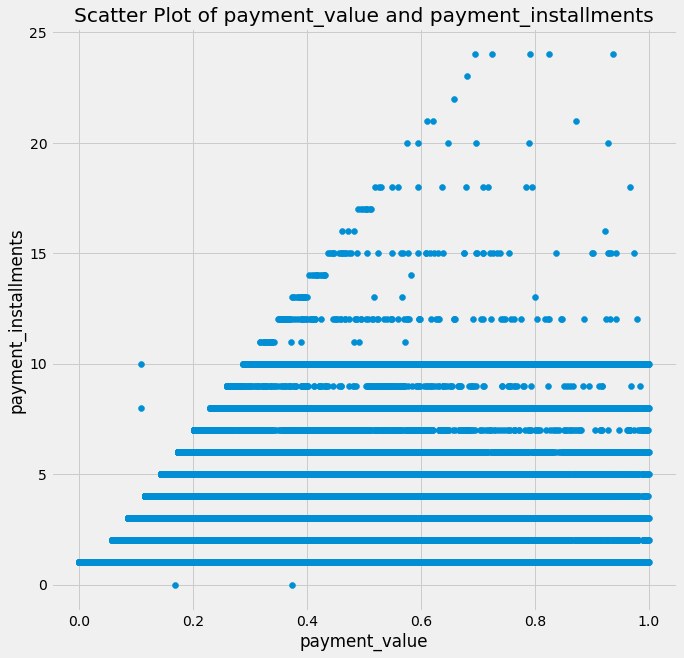

In [ ]:
#Check the scatter plot of the variable
plt.scatter(df_cluster['payment_value'], df['payment_installments'])
plt.xlabel("payment_value")
plt.ylabel("payment_installments")
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Scatter Plot of payment_value and payment_installments");

In [ ]:
#We scale our variable from 0-1
scaler = MinMaxScaler()
df_cluster[['payment_value', 'payment_installments']]= scaler.fit_transform(df_cluster[['payment_value', 'payment_installments']])
df_cluster

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,payment_value,payment_installments
2,0.053509,0.041667
3,0.407173,0.041667
4,0.515572,0.125000
5,0.207818,0.041667
6,0.082379,0.041667
...,...,...
103881,0.448995,0.125000
103882,0.244891,0.125000
103883,0.561280,0.125000
103884,0.780064,0.208333


##4.3 Determine Cluster Number

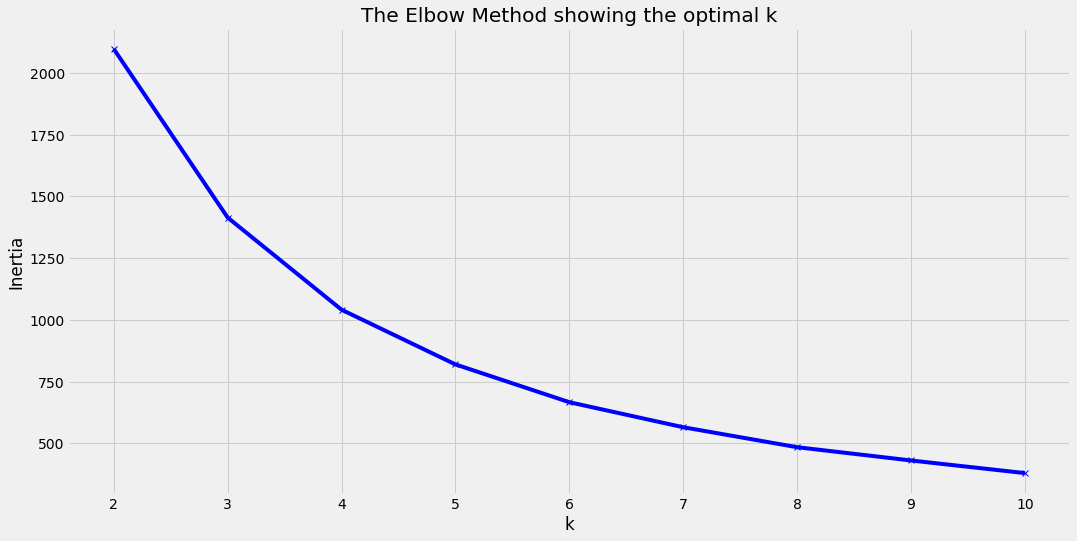

In [ ]:
#Check the elbow method to determine K number
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
!gdown https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l

Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 6.70MB/s]


In [ ]:
#Import library for silhoutte analysis
from silhoutte import silhoutte_analysis

For n_clusters = 2 The average silhouette_score is : 0.5396837819575934
For n_clusters = 3 The average silhouette_score is : 0.4556594265115956
For n_clusters = 4 The average silhouette_score is : 0.4852996478427203
For n_clusters = 5 The average silhouette_score is : 0.4331756402857908
For n_clusters = 6 The average silhouette_score is : 0.453164252964881
For n_clusters = 7 The average silhouette_score is : 0.4207540029806359
For n_clusters = 8 The average silhouette_score is : 0.4155782126877031
For n_clusters = 9 The average silhouette_score is : 0.39624078565887366
For n_clusters = 10 The average silhouette_score is : 0.4082771783832161


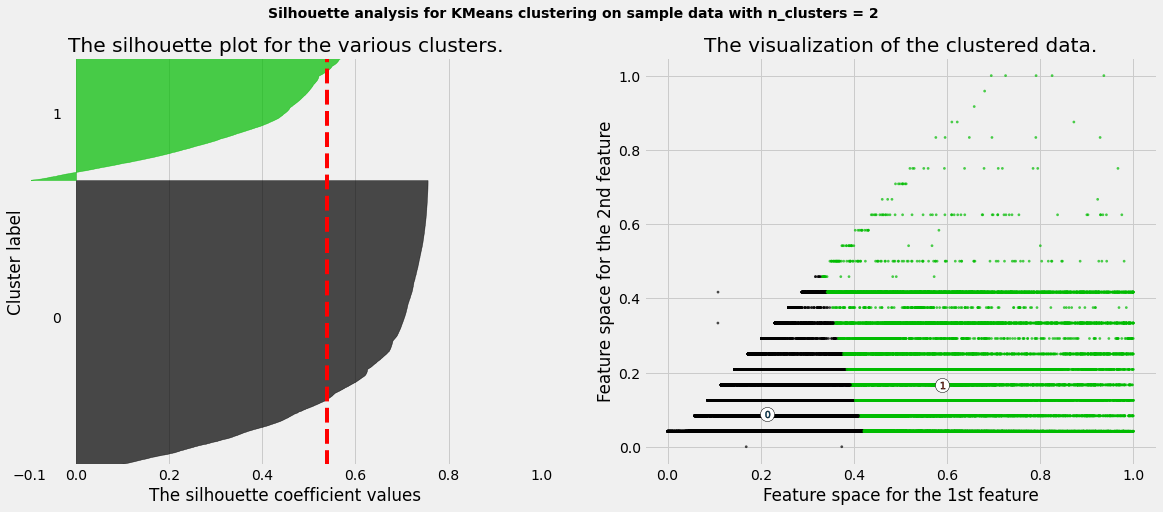

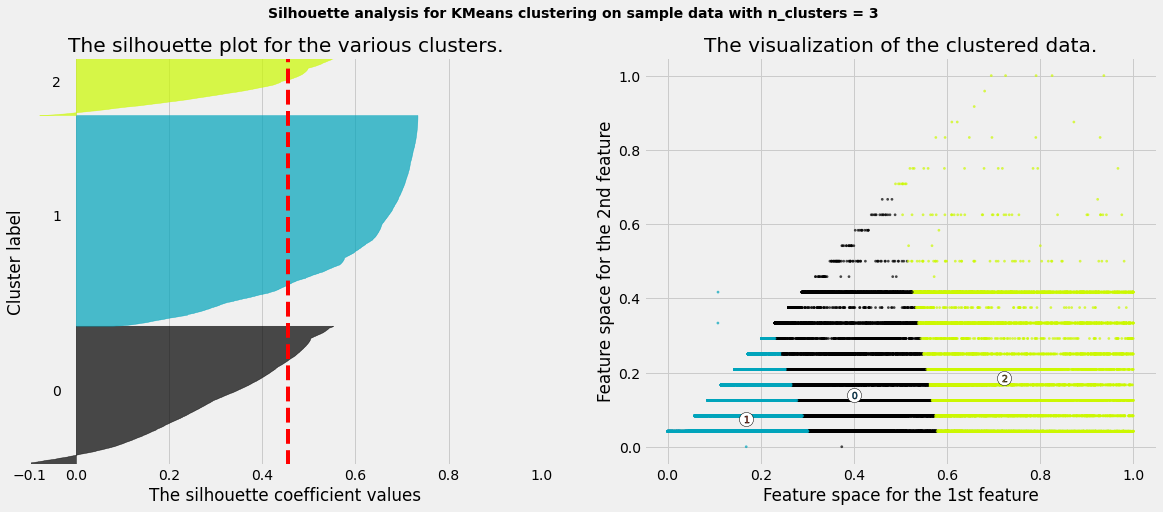

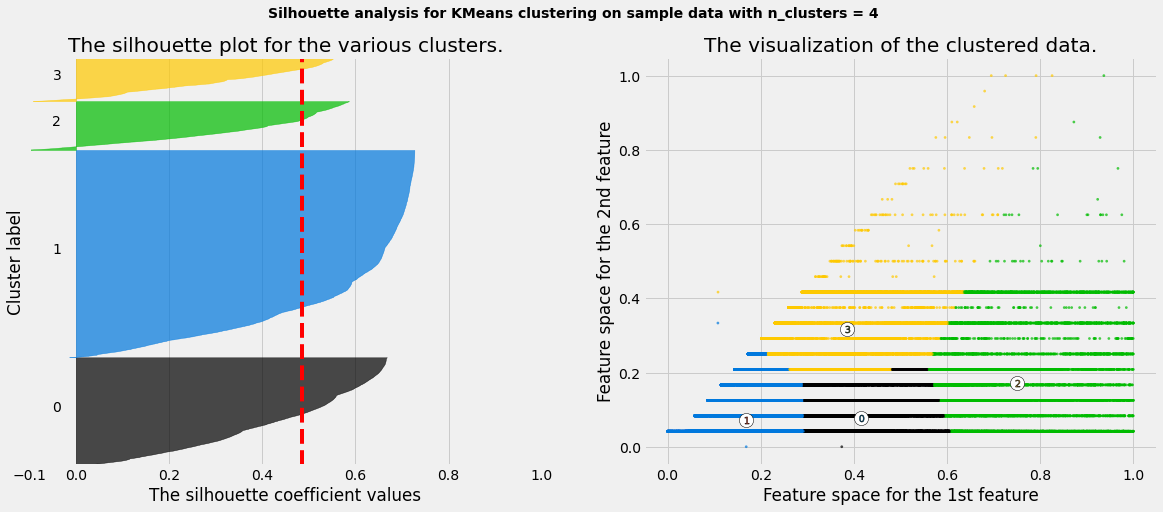

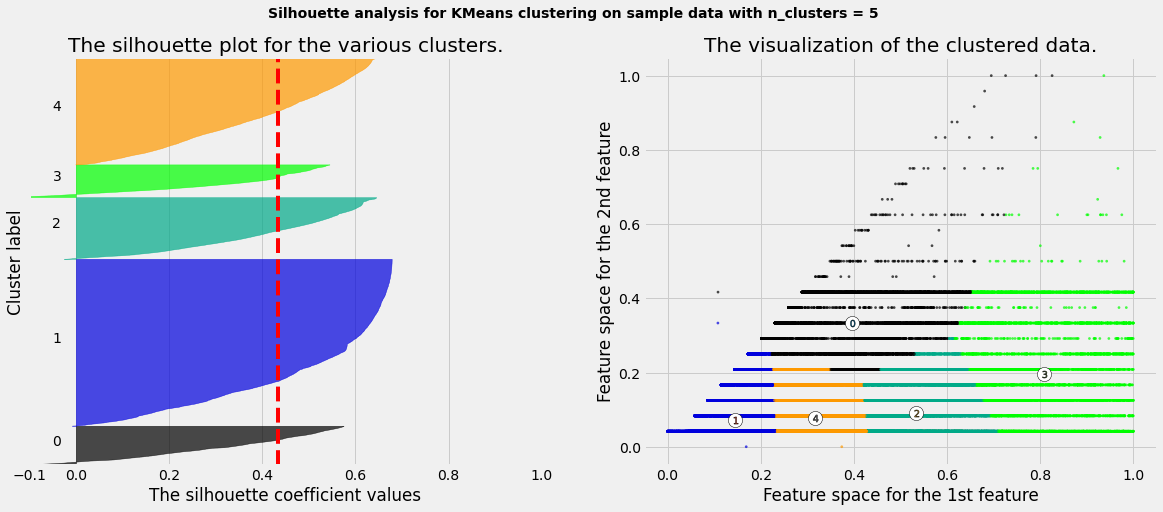

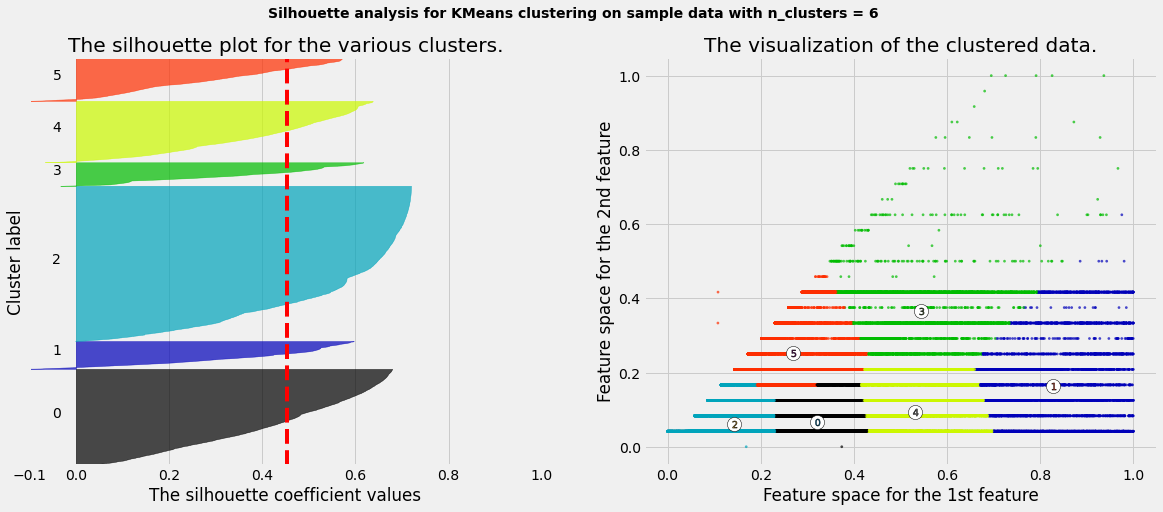

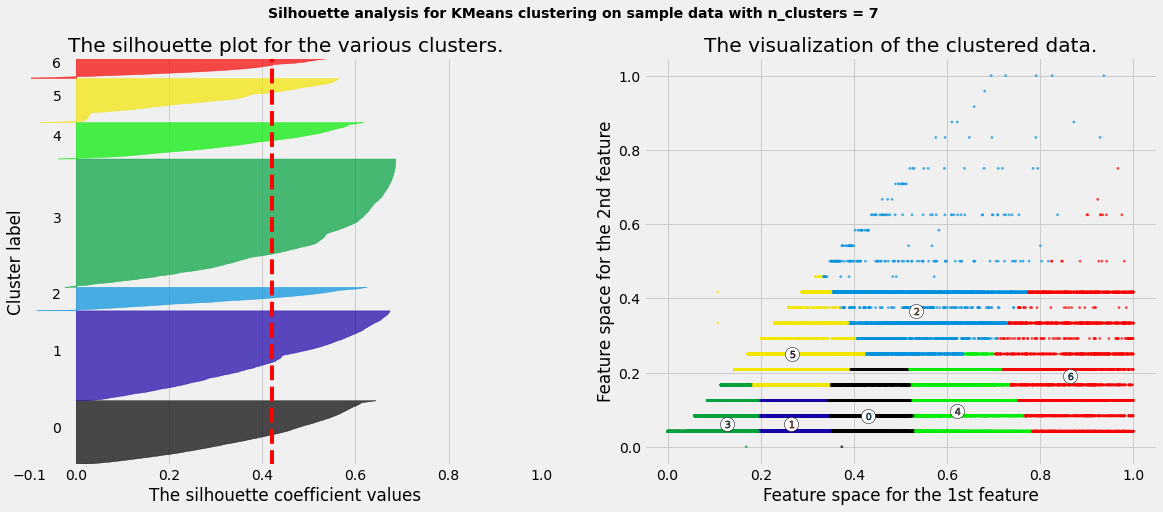

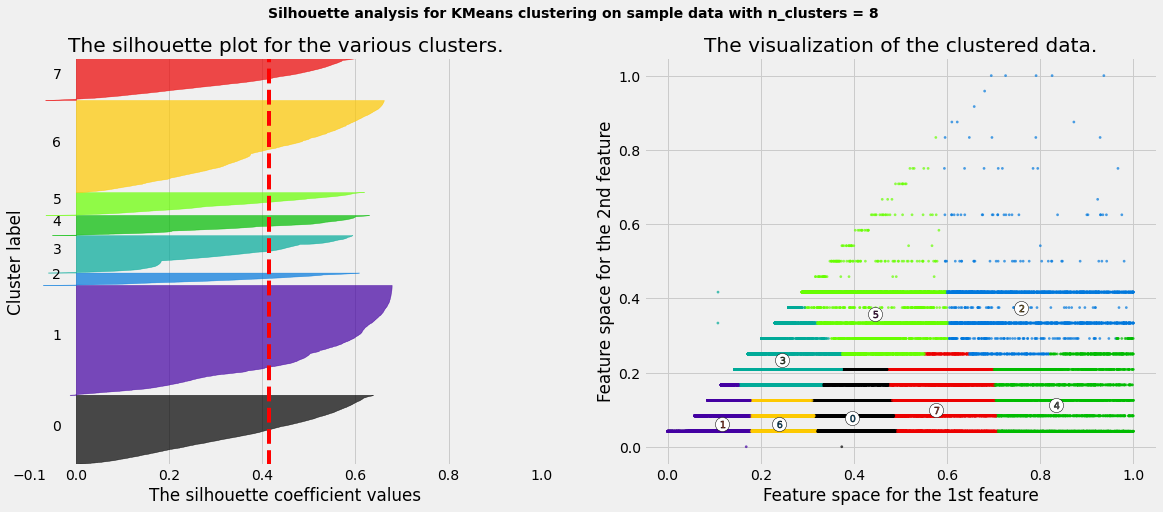

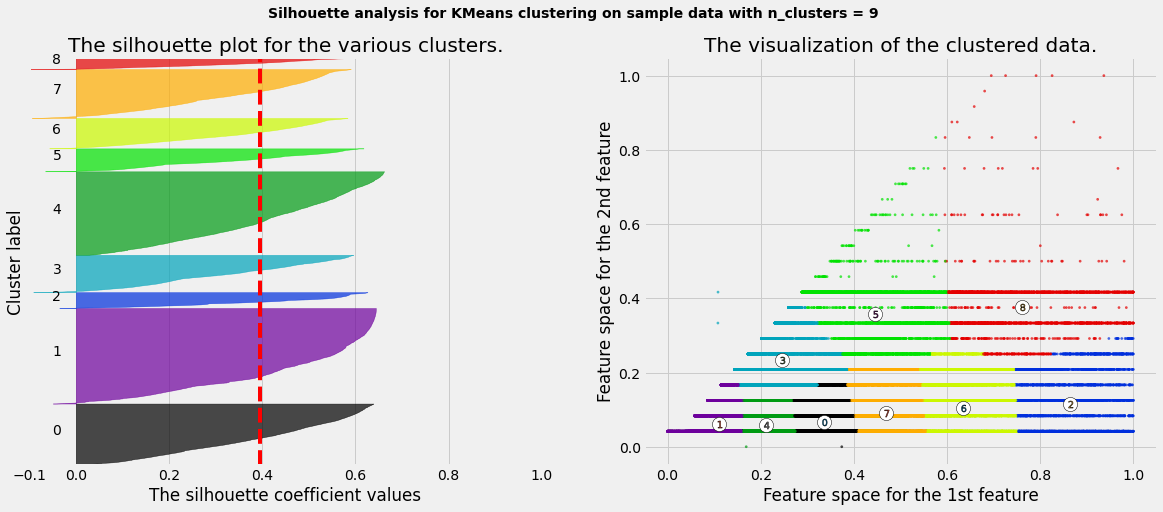

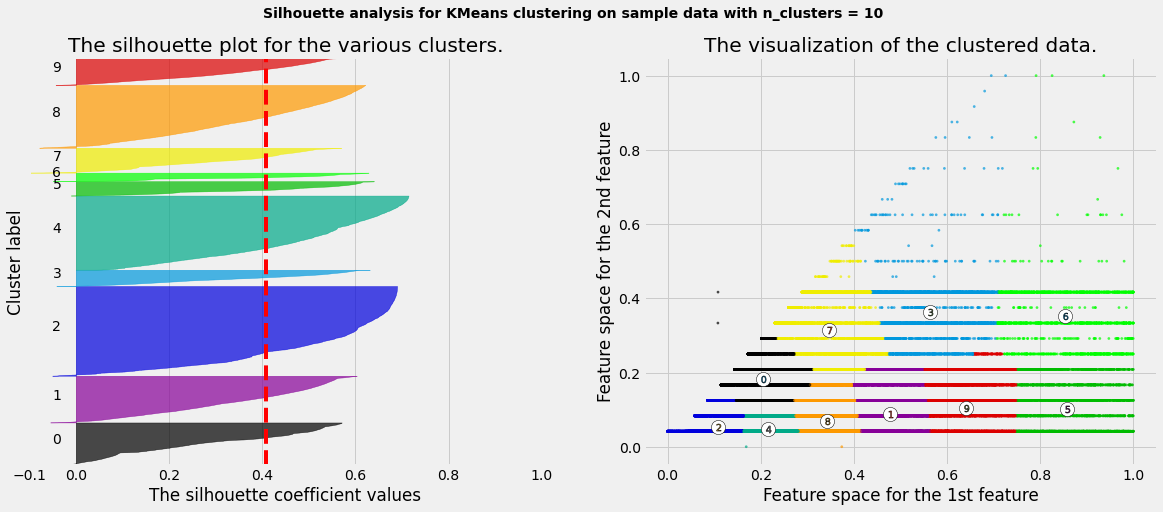

In [ ]:
#Check silhoutte analysis to determine the number of K
silhoutte_analysis(df_cluster,list(range(2,11)))

## 4.4 Add Cluster to Main Dataset

In [ ]:
#From Elbow Method and Silhouette Analysis, I choose 4 cluster. My choice of 4 cluster is good in Elbow Method and Silhouette Analysis
cluster_model = cluster.KMeans(n_clusters=4, random_state=3)
cluster_label = cluster_model.fit_predict(df_cluster)
df['cluster'] = cluster_label
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city,customer_state,hour_order,day_order,month_order,year_order,cluster
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,voucher,1.0,18.59,sao paulo,SP,10,0,2017/10,2017,3
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,boleto,1.0,141.46,barreiras,BA,20,1,2018/07,2018,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,credit_card,3.0,179.12,vianopolis,GO,8,2,2018/08,2018,0
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,credit_card,1.0,72.20,sao goncalo do amarante,RN,19,5,2017/11,2017,3
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,credit_card,1.0,28.62,santo andre,SP,21,1,2018/02,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-06 11:08:08,2017-03-22,credit_card,3.0,155.99,sao paulo,SP,9,3,2017/02,2017,0
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,credit_card,3.0,85.08,sao jose dos campos,SP,9,3,2017/03,2017,3
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,credit_card,3.0,195.00,praia grande,SP,12,1,2018/02,2018,0
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,credit_card,5.0,271.01,nova vicosa,BA,14,6,2017/08,2017,1


##4.5 Check the Characteristic of Each Cluster

In [ ]:
#Make the dataset of each cluster
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]
cluster3 = df[df['cluster']==3]

In [ ]:
#total payment by payment type in cluster 0
payment_bypayment_type = cluster0.groupby(cluster0["payment_type"], as_index=False)["payment_value"].agg("sum").sort_values(by="payment_value",ascending=False)
payment_bypayment_type["Percentage(%)"] = round((payment_bypayment_type["payment_value"]/payment_bypayment_type["payment_value"].sum())*100,2)
payment_bypayment_type

,payment_type,payment_value,Percentage(%)
1,credit_card,2469299.86,70.82
0,boleto,888681.67,25.49
2,debit_card,65003.57,1.86
3,voucher,63531.74,1.82


In [ ]:
#total payment by payment type in cluster 1
payment_bypayment_type = cluster1.groupby(cluster1["payment_type"], as_index=False)["payment_value"].agg("sum").sort_values(by="payment_value",ascending=False)
payment_bypayment_type["Percentage(%)"] = round((payment_bypayment_type["payment_value"]/payment_bypayment_type["payment_value"].sum())*100,2)
payment_bypayment_type

,payment_type,payment_value,Percentage(%)
1,credit_card,2319877.68,81.50
0,boleto,464573.15,16.32
2,debit_card,35378.39,1.24
3,voucher,26689.63,0.94


In [ ]:
#total payment by payment type in cluster 2
payment_bypayment_type = cluster2.groupby(cluster2["payment_type"], as_index=False)["payment_value"].agg("sum").sort_values(by="payment_value",ascending=False)
payment_bypayment_type["Percentage(%)"] = round((payment_bypayment_type["payment_value"]/payment_bypayment_type["payment_value"].sum())*100,2)
payment_bypayment_type

,payment_type,payment_value,Percentage(%)
0,credit_card,1320931.17,100.0


In [ ]:
#total payment by payment type in cluster 3
payment_bypayment_type = cluster3.groupby(cluster3["payment_type"], as_index=False)["payment_value"].agg("sum").sort_values(by="payment_value",ascending=False)
payment_bypayment_type["Percentage(%)"] = round((payment_bypayment_type["payment_value"]/payment_bypayment_type["payment_value"].sum())*100,2)
payment_bypayment_type

,payment_type,payment_value,Percentage(%)
1,credit_card,1927052.43,71.25
0,boleto,624180.84,23.08
3,voucher,103520.38,3.83
2,debit_card,49945.98,1.85


##4.6 Naming the Cluster Analysis

From the analysis above, we can determine the characteristic of 4 cluster:
*   Cluster 0: Middle Buying Power, Risk Averse
*   Cluster 1: Low Buying Power
*   Cluster 2: Use only credit card, High Buying Power
*   Cluster 3:  Middle Buying Power, Risk Taker

## 4.7 Business Recomendation of Cluster Analysis

**Here is the recomendation of each cluster in this analysis:**

*   For cluster 0, we can give them advertisement of cheap goods or simple product. The reason is because the buying power of this group is low.
*   For cluster 1, we can give them advertisement of cheap and middle price goods. Although the buying power of this group is medium, they cannot buy expensive goods because they afraid to borrow money.
*   For cluster 2, we can give them advertisement of luxury and expensive goods. The reason is because this cluster is having high buying power and all of them have credit card. 
*   For cluster 3, we can give them advertisement of medium and luxury price goods. We can also give discount and voucher to this cluster so they can buy more.

##5. Source

This project is my assignment from RevoU